##Instalando e Importando Bibliotecas

In [ ]:
import os
import pandas as pd
from datetime import date
import numpy as np

## Carregando Dataset

In [ ]:
df = pd.read_csv('/content/deslizamentos.csv')

In [ ]:
df.head(-1)

,ID,data_hora,latitude,longitude,volume_deslizado_m3,confianca,tipo_solo,cobertura_vegetal,temperatura_c,umidade_solo_percentual,precipitacao_mm_24h,declividade_graus,tipo_deslizamento
0,1,2023-05-02 17:38:16,-16.100175,-40.356378,45158.568544,0.761551,silte,floresta,39.405338,63.777786,89.257872,46.840252,espalhamento
1,2,2020-07-21 13:39:16,-23.150939,-69.712490,34118.992237,0.674569,areia,area_exposta,12.627583,70.329994,145.410736,39.867202,queda
2,3,2022-02-13 20:44:01,-2.912519,-38.749811,10089.240118,0.768851,areia,pastagem,36.864954,32.767446,176.046246,12.866657,fluxo
3,4,2015-03-20 12:22:47,-21.855936,-47.283415,39617.817940,0.606075,argila,agricola,14.458547,77.871035,171.420065,31.513639,profundo
4,5,2020-02-13 04:02:07,-2.815550,-71.415220,31350.858630,0.559503,areia,urbana,38.265893,20.916753,48.415655,15.982697,queda
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,2024-04-27 08:46:17,-15.416662,-73.726310,24019.801991,0.672447,silte,floresta,17.561730,75.443459,50.438857,21.921812,raso
995,996,2019-07-12 10:50:32,-17.865723,-54.337270,37589.505228,0.651364,argila,area_exposta,15.504355,37.851895,130.209350,39.210850,profundo
996,997,2023-03-17 17:00:46,-4.264795,-36.635318,6604.578981,0.998329,argila,urbana,23.672577,62.339167,151.852918,33.556352,profundo
997,998,2022-02-07 18:43:55,-3.166038,-39.571148,25429.874511,0.746944,silte,floresta,29.507331,36.918859,132.566298,28.312390,fluxo


## Limpando Dataset
Drop da feature ID por ser um identificador

In [ ]:
df.drop(['ID'],axis = 1, inplace = True, errors = 'ignore')
df.shape

(1000, 12)

In [ ]:
df.head()

,data_hora,latitude,longitude,volume_deslizado_m3,confianca,tipo_solo,cobertura_vegetal,temperatura_c,umidade_solo_percentual,precipitacao_mm_24h,declividade_graus,tipo_deslizamento
0,2023-05-02 17:38:16,-16.100175,-40.356378,45158.568544,0.761551,silte,floresta,39.405338,63.777786,89.257872,46.840252,espalhamento
1,2020-07-21 13:39:16,-23.150939,-69.712490,34118.992237,0.674569,areia,area_exposta,12.627583,70.329994,145.410736,39.867202,queda
2,2022-02-13 20:44:01,-2.912519,-38.749811,10089.240118,0.768851,areia,pastagem,36.864954,32.767446,176.046246,12.866657,fluxo
3,2015-03-20 12:22:47,-21.855936,-47.283415,39617.817940,0.606075,argila,agricola,14.458547,77.871035,171.420065,31.513639,profundo
4,2020-02-13 04:02:07,-2.815550,-71.415220,31350.858630,0.559503,areia,urbana,38.265893,20.916753,48.415655,15.982697,queda


In [ ]:
# Converter tipo de deslizamentos / tipo_solo / cobertura_vegetal em números (0/1)
df = pd.get_dummies(df, columns=['tipo_deslizamento', 'tipo_solo', 'cobertura_vegetal'], drop_first=True)


In [ ]:
df.head()

,data_hora,latitude,longitude,volume_deslizado_m3,confianca,temperatura_c,umidade_solo_percentual,precipitacao_mm_24h,declividade_graus,tipo_deslizamento_fluxo,...,tipo_deslizamento_queda,tipo_deslizamento_raso,tipo_solo_argila,tipo_solo_misto,tipo_solo_rocha,tipo_solo_silte,cobertura_vegetal_area_exposta,cobertura_vegetal_floresta,cobertura_vegetal_pastagem,cobertura_vegetal_urbana
0,2023-05-02 17:38:16,-16.100175,-40.356378,45158.568544,0.761551,39.405338,63.777786,89.257872,46.840252,False,...,False,False,False,False,False,True,False,True,False,False
1,2020-07-21 13:39:16,-23.150939,-69.712490,34118.992237,0.674569,12.627583,70.329994,145.410736,39.867202,False,...,True,False,False,False,False,False,True,False,False,False
2,2022-02-13 20:44:01,-2.912519,-38.749811,10089.240118,0.768851,36.864954,32.767446,176.046246,12.866657,True,...,False,False,False,False,False,False,False,False,True,False
3,2015-03-20 12:22:47,-21.855936,-47.283415,39617.817940,0.606075,14.458547,77.871035,171.420065,31.513639,False,...,False,False,True,False,False,False,False,False,False,False
4,2020-02-13 04:02:07,-2.815550,-71.415220,31350.858630,0.559503,38.265893,20.916753,48.415655,15.982697,False,...,True,False,False,False,False,False,False,False,False,True


Dropando as variáveis:


*   latitude
*   longitude

Todas  não tem valor muito significativo, tanto para análise descritiva, quanto para o modelo



In [ ]:
df.drop(['latitude', 'longitude'],axis = 1, inplace = True, errors = 'ignore')
df.shape

(1000, 19)

In [ ]:
df.head()

,data_hora,volume_deslizado_m3,confianca,temperatura_c,umidade_solo_percentual,precipitacao_mm_24h,declividade_graus,tipo_deslizamento_fluxo,tipo_deslizamento_profundo,tipo_deslizamento_queda,tipo_deslizamento_raso,tipo_solo_argila,tipo_solo_misto,tipo_solo_rocha,tipo_solo_silte,cobertura_vegetal_area_exposta,cobertura_vegetal_floresta,cobertura_vegetal_pastagem,cobertura_vegetal_urbana
0,2023-05-02 17:38:16,45158.568544,0.761551,39.405338,63.777786,89.257872,46.840252,False,False,False,False,False,False,False,True,False,True,False,False
1,2020-07-21 13:39:16,34118.992237,0.674569,12.627583,70.329994,145.410736,39.867202,False,False,True,False,False,False,False,False,True,False,False,False
2,2022-02-13 20:44:01,10089.240118,0.768851,36.864954,32.767446,176.046246,12.866657,True,False,False,False,False,False,False,False,False,False,True,False
3,2015-03-20 12:22:47,39617.817940,0.606075,14.458547,77.871035,171.420065,31.513639,False,True,False,False,True,False,False,False,False,False,False,False
4,2020-02-13 04:02:07,31350.858630,0.559503,38.265893,20.916753,48.415655,15.982697,False,False,True,False,False,False,False,False,False,False,False,True


## Removendo Outliers
Criando uma função para remover outliers

In [ ]:
import pandas as pd

# Seleciona apenas colunas numéricas
colunas_numericas = df.select_dtypes(include='number').columns
df_filtrado = df.copy()

for coluna in colunas_numericas:
    Q1 = df_filtrado[coluna].quantile(0.25)
    Q3 = df_filtrado[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    df_filtrado = df_filtrado[(df_filtrado[coluna] >= limite_inferior) & (df_filtrado[coluna] <= limite_superior)]

df = df_filtrado


## Features com valores unicos
Verificando a existência de features com valores únicos (vamos dropar pais e mês, pois só temos 1)

In [ ]:
df.nunique().sort_values()

,0
tipo_deslizamento_fluxo,2
tipo_solo_silte,2
tipo_solo_rocha,2
tipo_solo_misto,2
tipo_solo_argila,2
tipo_deslizamento_raso,2
tipo_deslizamento_queda,2
tipo_deslizamento_profundo,2
cobertura_vegetal_area_exposta,2
cobertura_vegetal_urbana,2


In [ ]:
df.head()

,data_hora,volume_deslizado_m3,confianca,temperatura_c,umidade_solo_percentual,precipitacao_mm_24h,declividade_graus,tipo_deslizamento_fluxo,tipo_deslizamento_profundo,tipo_deslizamento_queda,tipo_deslizamento_raso,tipo_solo_argila,tipo_solo_misto,tipo_solo_rocha,tipo_solo_silte,cobertura_vegetal_area_exposta,cobertura_vegetal_floresta,cobertura_vegetal_pastagem,cobertura_vegetal_urbana
0,2023-05-02 17:38:16,45158.568544,0.761551,39.405338,63.777786,89.257872,46.840252,False,False,False,False,False,False,False,True,False,True,False,False
1,2020-07-21 13:39:16,34118.992237,0.674569,12.627583,70.329994,145.410736,39.867202,False,False,True,False,False,False,False,False,True,False,False,False
2,2022-02-13 20:44:01,10089.240118,0.768851,36.864954,32.767446,176.046246,12.866657,True,False,False,False,False,False,False,False,False,False,True,False
3,2015-03-20 12:22:47,39617.817940,0.606075,14.458547,77.871035,171.420065,31.513639,False,True,False,False,True,False,False,False,False,False,False,False
4,2020-02-13 04:02:07,31350.858630,0.559503,38.265893,20.916753,48.415655,15.982697,False,False,True,False,False,False,False,False,False,False,False,True


## Verificando dados Nulos

In [ ]:
df.isna().sum()

,0
data_hora,0
volume_deslizado_m3,0
confianca,0
temperatura_c,0
umidade_solo_percentual,0
precipitacao_mm_24h,0
declividade_graus,0
tipo_deslizamento_fluxo,0
tipo_deslizamento_profundo,0
tipo_deslizamento_queda,0


## Verificando Dtypes

In [ ]:
df.dtypes


,0
data_hora,object
volume_deslizado_m3,float64
confianca,float64
temperatura_c,float64
umidade_solo_percentual,float64
precipitacao_mm_24h,float64
declividade_graus,float64
tipo_deslizamento_fluxo,bool
tipo_deslizamento_profundo,bool
tipo_deslizamento_queda,bool


In [ ]:
df.head()

,data_hora,volume_deslizado_m3,confianca,temperatura_c,umidade_solo_percentual,precipitacao_mm_24h,declividade_graus,tipo_deslizamento_fluxo,tipo_deslizamento_profundo,tipo_deslizamento_queda,tipo_deslizamento_raso,tipo_solo_argila,tipo_solo_misto,tipo_solo_rocha,tipo_solo_silte,cobertura_vegetal_area_exposta,cobertura_vegetal_floresta,cobertura_vegetal_pastagem,cobertura_vegetal_urbana
0,2023-05-02 17:38:16,45158.568544,0.761551,39.405338,63.777786,89.257872,46.840252,False,False,False,False,False,False,False,True,False,True,False,False
1,2020-07-21 13:39:16,34118.992237,0.674569,12.627583,70.329994,145.410736,39.867202,False,False,True,False,False,False,False,False,True,False,False,False
2,2022-02-13 20:44:01,10089.240118,0.768851,36.864954,32.767446,176.046246,12.866657,True,False,False,False,False,False,False,False,False,False,True,False
3,2015-03-20 12:22:47,39617.817940,0.606075,14.458547,77.871035,171.420065,31.513639,False,True,False,False,True,False,False,False,False,False,False,False
4,2020-02-13 04:02:07,31350.858630,0.559503,38.265893,20.916753,48.415655,15.982697,False,False,True,False,False,False,False,False,False,False,False,True


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   data_hora                       1000 non-null   object 
 1   volume_deslizado_m3             1000 non-null   float64
 2   confianca                       1000 non-null   float64
 3   temperatura_c                   1000 non-null   float64
 4   umidade_solo_percentual         1000 non-null   float64
 5   precipitacao_mm_24h             1000 non-null   float64
 6   declividade_graus               1000 non-null   float64
 7   tipo_deslizamento_fluxo         1000 non-null   bool   
 8   tipo_deslizamento_profundo      1000 non-null   bool   
 9   tipo_deslizamento_queda         1000 non-null   bool   
 10  tipo_deslizamento_raso          1000 non-null   bool   
 11  tipo_solo_argila                1000 non-null   bool   
 12  tipo_solo_misto                 100

In [ ]:
df['data_hora'] = pd.to_datetime(df['data_hora'], errors='coerce')
df['horario'] = df['data_hora'].dt.hour


In [ ]:
df.drop('data_hora',axis = 1, inplace = True, errors = 'ignore')
df.shape

(1000, 19)

In [ ]:
df.head(-1)

,volume_deslizado_m3,confianca,temperatura_c,umidade_solo_percentual,precipitacao_mm_24h,declividade_graus,tipo_deslizamento_fluxo,tipo_deslizamento_profundo,tipo_deslizamento_queda,tipo_deslizamento_raso,tipo_solo_argila,tipo_solo_misto,tipo_solo_rocha,tipo_solo_silte,cobertura_vegetal_area_exposta,cobertura_vegetal_floresta,cobertura_vegetal_pastagem,cobertura_vegetal_urbana,horario
0,45158.568544,0.761551,39.405338,63.777786,89.257872,46.840252,False,False,False,False,False,False,False,True,False,True,False,False,17
1,34118.992237,0.674569,12.627583,70.329994,145.410736,39.867202,False,False,True,False,False,False,False,False,True,False,False,False,13
2,10089.240118,0.768851,36.864954,32.767446,176.046246,12.866657,True,False,False,False,False,False,False,False,False,False,True,False,20
3,39617.817940,0.606075,14.458547,77.871035,171.420065,31.513639,False,True,False,False,True,False,False,False,False,False,False,False,12
4,31350.858630,0.559503,38.265893,20.916753,48.415655,15.982697,False,False,True,False,False,False,False,False,False,False,False,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,24019.801991,0.672447,17.561730,75.443459,50.438857,21.921812,False,False,False,True,False,False,False,True,False,True,False,False,8
995,37589.505228,0.651364,15.504355,37.851895,130.209350,39.210850,False,True,False,False,True,False,False,False,True,False,False,False,10
996,6604.578981,0.998329,23.672577,62.339167,151.852918,33.556352,False,True,False,False,True,False,False,False,False,False,False,True,17
997,25429.874511,0.746944,29.507331,36.918859,132.566298,28.312390,True,False,False,False,False,False,False,True,False,True,False,False,18


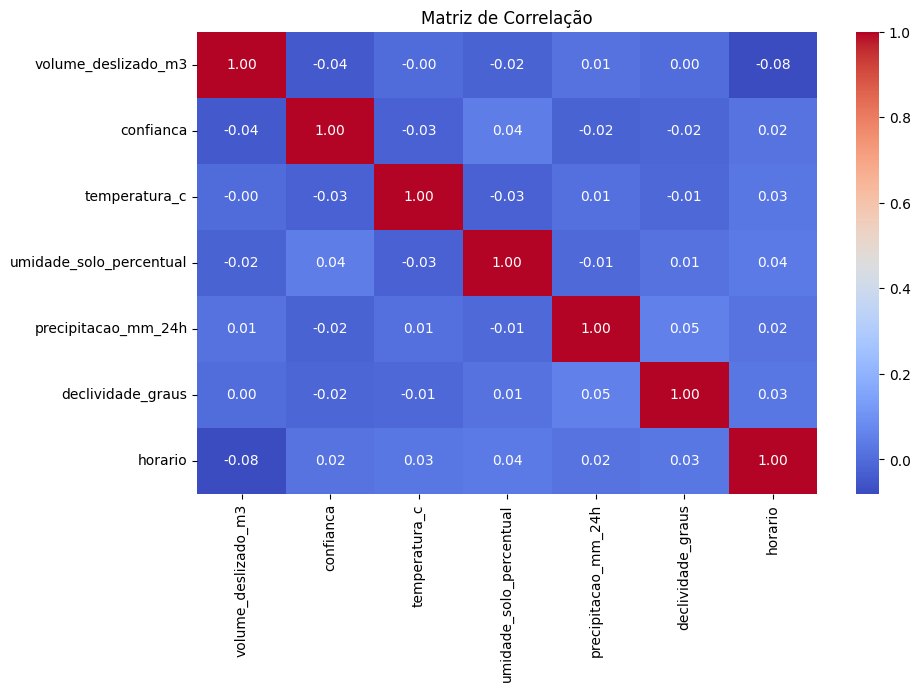

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()



## Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Variável alvo (y): frp
y = df['volume_deslizado_m3']

# Variáveis preditoras (X): todas menos 'frp'
X = df.drop('volume_deslizado_m3', axis=1)


# Dividir em treino e teste (opcional, mas recomendado)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_test.to_csv('X_test.csv', index=False)

In [ ]:
# Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Fazer predições
y_pred = modelo.predict(X_test)

In [ ]:
# Avaliar o modelo
print("Coeficiente angular (a):", modelo.coef_[0].round(2))
print("Intercepto (b):", modelo.intercept_.round(2))
print("MSE:", mean_squared_error(y_test, y_pred))

Coeficiente angular (a): -1673.3
Intercepto (b): 29221.36
MSE: 192666290.52255142


In [ ]:
import joblib

# Supondo que seu modelo esteja treinado
joblib.dump(modelo, 'modelo_regressao_linear.pkl')


In [ ]:
max(df['volume_deslizado_m3'])

49987.43650645138